#Graph 1

In [ ]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import jax
from jax import grad, vmap
import jax.numpy as jnp
import torch
import tqdm
import scipy
from scipy import integrate

In [ ]:
jax.config.update("jax_enable_x64", True)

In [ ]:
#Exponential kernel for two inputs i.e. ID
def kernel(s,t,params):
  #K = jnp.exp(-(s-t)**2/(2*sigma1**2))
  K = (1+jnp.sqrt(5)*jnp.abs(s-t)/params[0]+5/3*jnp.abs(s-t)**2/params[0]**2)*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])
  return K

In [ ]:
def kernel_u(s,t,params):
  #K = -(s-t)*kernel(s,t,params)/params[0]**2
  K = -5*(s-t)*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(params[0]+jnp.sqrt(5)*jnp.abs(s-t))/(3*params[0]**3)
  return K

def kernel_z(s,t,params):
  #K = (s-t)*kernel(s,t,params)/params[0]**2
  K = 5*(s-t)*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(params[0]+jnp.sqrt(5)*jnp.abs(s-t))/(3*params[0]**3)
  return K

def kernel_uz(s,t,params):
  #K = (params[0]**2-(s-t)**2)*kernel(s,t,params)/params[0]**4
  K = 5*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(jnp.sqrt(5)*params[0]*jnp.abs(s-t)+params[0]**2-5*(s-t)**2)/(3*params[0]**4)
  return K

def kernel_uuz(s,t,params):
  #K = (s-t)*((s-t)**2-3*params[0]**2)*kernel(s,t,params)/params[0]**6
  K = 25*(s-t)*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(jnp.sqrt(5)*jnp.abs(s-t)-3*params[0])/(3*params[0]**5)
  return K

def kernel_uzz(s,t,params):
  #K = -(s-t)*((s-t)**2-3*params[0]**2)*kernel(s,t,params)/params[0]**6
  K = -25*(s-t)*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(jnp.sqrt(5)*jnp.abs(s-t)-3*params[0])/(3*params[0]**5)
  return K

def kernel_zzz(s,t,params):
  #K = (s-t)*((s-t)**2-3*params[0]**2)*kernel(s,t,params)/params[0]**6
  K = 25*(s-t)*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(jnp.sqrt(5)*jnp.abs(s-t)-3*params[0])/(3*params[0]**5)
  return K

def kernel_uuu(s,t,params):
  #K = (s-t)*((s-t)**2-3*params[0]**2)*kernel(s,t,params)/params[0]**6
  K = -25*(s-t)*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(jnp.sqrt(5)*jnp.abs(s-t)-3*params[0])/(3*params[0]**5)
  return K

def kernel_uu(s,t,params):
  #K = ((s-t)**2-params[0]**2)*kernel(s,t,params)/params[0]**4
  K =  -5*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(jnp.sqrt(5)*params[0]*jnp.abs(s-t)+params[0]**2-5*(s-t)**2)/(3*params[0]**4)
  return K

def kernel_zz(s,t,params):
  #K = ((s-t)**2-params[0]**2)*kernel(s,t,params)/params[0]**4
  K =  -5*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(jnp.sqrt(5)*params[0]*jnp.abs(s-t)+params[0]**2-5*(s-t)**2)/(3*params[0]**4)
  return K

def kernel_uuzz(s,t,params):
  #K = kernel(s,t,params)*(3*params[0]**4-6*params[0]**2*(s-t)**2+(s-t)**4)/params[0]**8
  K = -25*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(5*jnp.sqrt(5)*params[0]*jnp.abs(s-t)-(3*params[0]**2+5*(s-t)**2))/(3*params[0]**6)
  return K

def kernel_uuuu(s,t,params):
  #K = kernel(s,t,params)*(3*params[0]**4-6*params[0]**2*(s-t)**2+(s-t)**4)/params[0]**8
  K = -25*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(5*jnp.sqrt(5)*params[0]*jnp.abs(s-t)-(3*params[0]**2+5*(s-t)**2))/(3*params[0]**6)
  return K

def kernel_zzzz(s,t,params):
  #K = kernel(s,t,params)*(3*params[0]**4-6*params[0]**2*(s-t)**2+(s-t)**4)/params[0]**8
  K = -25*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(5*jnp.sqrt(5)*params[0]*jnp.abs(s-t)-(3*params[0]**2+5*(s-t)**2))/(3*params[0]**6)
  return K

def kernel_uuuz(s,t,params):
  #K = kernel(s,t,params)*(3*params[0]**4-6*params[0]**2*(s-t)**2+(s-t)**4)/params[0]**8
  K = 25*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(5*jnp.sqrt(5)*params[0]*jnp.abs(s-t)-(3*params[0]**2+5*(s-t)**2))/(3*params[0]**6)
  return K

def kernel_uzzz(s,t,params):
  #K = kernel(s,t,params)*(3*params[0]**4-6*params[0]**2*(s-t)**2+(s-t)**4)/params[0]**8
  K = 25*jnp.exp(-jnp.sqrt(5)*jnp.abs(s-t)/params[0])*(5*jnp.sqrt(5)*params[0]*jnp.abs(s-t)-(3*params[0]**2+5*(s-t)**2))/(3*params[0]**6)
  return K

In [ ]:
#Start and end times for space (x) and time (t)
xbegin=0
xfinal=1
Tstart=0
Tend=1
#Space step
h=1/100
#Time step
c=1/10000
x = np.arange(xbegin, xfinal+h, h)
t = np.arange(Tstart, Tstart+2*c, c)

m=len(x)-1
p=len(t)-1
nu=0.5

In [ ]:
def heat(u):
  return (jnp.exp(-u/(2*nu))-jnp.exp(-1/(2*nu)))/(1-jnp.exp(-1/(2*nu)))

def error(u,u_true):
  return jnp.linalg.norm(u-u_true)/jnp.linalg.norm(u_true)

def rkhs_norm(K,Y):
  return Y[:,0].dot(jnp.linalg.inv(K)@Y)

In [ ]:
b = 25
a = 7
k = 2*np.pi
b2 = 7
a2 = 3.2

In [ ]:
k = 2*np.pi
burger_test=np.zeros((m+1,p+2))
burger_train1=np.zeros((m+1,p+2))


burger_train1[:,0] = 1/2-1/2*np.tanh((x-0.5)/(4*nu))
burger_dx_train1=np.zeros((m+1,p+1))
burger_dx2_train1=np.zeros((m+1,p+1))
burger_dx3_train1=np.zeros((m+1,p+1))

burger_test[:,0] = (2*nu*a*k*np.sin(k*x))/(b+a*np.cos(k*x))
burger_dx_test=np.zeros((m+1,p+1))
burger_dx2_test=np.zeros((m+1,p+1))
burger_dx3_test=np.zeros((m+1,p+1))

#Solve Burgers numerical via Euler
for n in range(p+1):
    spl0 = scipy.interpolate.splrep(x,burger_test[:,n],k=3)
    burger_dx_test[:,n] = scipy.interpolate.splev(x,spl0,der=1)
    burger_dx2_test[:,n] = scipy.interpolate.splev(x,spl0,der=2)
    burger_dx3_test[:,n] = scipy.interpolate.splev(x,spl0,der=3)
    burger_test[:,n+1] = (nu*burger_dx2_test[:,n] - burger_test[:,n]*burger_dx_test[:,n]+burger_test[:,n]/c)*c

    spl1 = scipy.interpolate.splrep(x,burger_train1[:,n],k=3)
    burger_dx_train1[:,n] = scipy.interpolate.splev(x,spl1,der=1)
    burger_dx2_train1[:,n] = scipy.interpolate.splev(x,spl1,der=2)
    burger_dx3_train1[:,n] = scipy.interpolate.splev(x,spl1,der=3)
    burger_train1[:,n+1] = (nu*burger_dx2_train1[:,n] - burger_train1[:,n]*burger_dx_train1[:,n]+burger_train1[:,n]/c)*c

In [ ]:
#Compute primitive of Burger's equation
antiburger_test=np.zeros((m+1,p+1))
antiburger_train1=np.zeros((m+1,p+1))

for n in range(p+1):
  for j in range(m+1):
    antiburger_train1[j,n] = integrate.simpson(burger_train1[:j+1,n],x[:j+1])
    antiburger_test[j,n] = integrate.simpson(burger_test[:j+1,n],x[:j+1])

<ipython-input-9-ca529b3328b2>:7: DeprecationWarning: You are passing x=[0.] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  antiburger_train1[j,n] = integrate.simpson(burger_train1[:j+1,n],x[:j+1])
<ipython-input-9-ca529b3328b2>:8: DeprecationWarning: You are passing x=[0.] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  antiburger_test[j,n] = integrate.simpson(burger_test[:j+1,n],x[:j+1])
<ipython-input-9-ca529b3328b2>:7: DeprecationWarning: You are passing x=[0.   0.01] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  antiburger_train1[j,n] = integrate.simpson(burger_train1[:j+1,n],x[:j+1])
<ipython-input-9-ca529b3328b2>:8: DeprecationWarning

In [ ]:
antiburger_train = antiburger_train1
burger_train = burger_train1
burger_dx_train = burger_dx_train1
burger_dx2_train = burger_dx2_train1
burger_dx3_train = burger_dx3_train1

In [ ]:
#Kernel matrix as function of one vector
def K_Matrix(X,Y,params,reg=False,nugget=10**-5):
  size=len(X[:,0])
  size2=len(Y[:,0])
  X0=jnp.transpose(jnp.tile(X[:,0],(size2,1)))
  Y0=jnp.transpose(jnp.tile(Y[:,0],(size,1)))

  val = vmap(lambda s, t: kernel(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())

  K_matrix=np.reshape(val,(size,size2))
  if reg==True and size==size2:
    K_matrix+=+nugget*jnp.eye(size)
  return K_matrix

In [ ]:
#Second derivative with respect to x
def K_dxx_00(X,Y,params,reg=False,nugget=10**-5):
  size=len(X[:,0])
  size2=len(Y[:,0])
  X0=jnp.transpose(jnp.tile(X[:,0],(size2,1)))
  Y0=jnp.transpose(jnp.tile(Y[:,0],(size,1)))

  K_du = vmap(lambda s, t: kernel_u(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_du = np.reshape(K_du,(size,size2))

  K_duu = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duu = np.reshape(K_duu,(size,size2))

  K_dz = vmap(lambda s, t: kernel_z(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dz = np.reshape(K_dz,(size,size2))

  K_dzz = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dzz = np.reshape(K_dzz,(size,size2))

  K_duz = vmap(lambda s, t: kernel_uz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duz = np.reshape(K_duz,(size,size2))

  K_dxx= burger_dx_train[:,0].reshape((size,1))*K_du+burger_train[:,0].reshape((size,1))**2*K_duu
  K_dxx+= burger_dx_train[:,0]*K_dz+burger_train[:,0]**2*K_dzz
  K_dxx+= 2*np.outer(burger_train[:,0],burger_train[:,0])*K_duz

  if reg==True and size==size2:
    K_dxx+=+nugget*jnp.eye(size)
  return K_dxx

In [ ]:
#Second derivative with respect to x
def K_dxx_01(X,Y,params,reg=False,nugget=10**-5):
  size=len(X[:,0])
  size2=len(Y[:,0])
  X0=jnp.transpose(jnp.tile(X[:,0],(size2,1)))
  Y0=jnp.transpose(jnp.tile(Y[:,0],(size,1)))

  K_du = vmap(lambda s, t: kernel_u(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_du = np.reshape(K_du,(size,size2))

  K_duu = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duu = np.reshape(K_duu,(size,size2))

  K_dz = vmap(lambda s, t: kernel_z(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dz = np.reshape(K_dz,(size,size2))

  K_dzz = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dzz = np.reshape(K_dzz,(size,size2))

  K_duz = vmap(lambda s, t: kernel_uz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duz = np.reshape(K_duz,(size,size2))

  K_dxx= burger_dx_train[:,0].reshape((size,1))*K_du+burger_train[:,0].reshape((size,1))**2*K_duu
  K_dxx+= burger_dx_train[:,1]*K_dz+burger_train[:,1]**2*K_dzz
  K_dxx+= 2*np.outer(burger_train[:,0],burger_train[:,1])*K_duz

  if reg==True and size==size2:
    K_dxx+=+nugget*jnp.eye(size)
  return K_dxx

In [ ]:
#Second derivative with respect to x
def K_dxx_10(X,Y,params,reg=False,nugget=10**-5):
  size=len(X[:,0])
  size2=len(Y[:,0])
  X0=jnp.transpose(jnp.tile(X[:,0],(size2,1)))
  Y0=jnp.transpose(jnp.tile(Y[:,0],(size,1)))

  K_du = vmap(lambda s, t: kernel_u(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_du = np.reshape(K_du,(size,size2))

  K_duu = vmap(lambda s, t:kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duu = np.reshape(K_duu,(size,size2))

  K_dz = vmap(lambda s, t: kernel_z(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dz = np.reshape(K_dz,(size,size2))

  K_dzz = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dzz = np.reshape(K_dzz,(size,size2))

  K_duz = vmap(lambda s, t: kernel_uz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duz = np.reshape(K_duz,(size,size2))

  K_dxx= burger_dx_train[:,1].reshape((size,1))*K_du+burger_train[:,1].reshape((size,1))**2*K_duu
  K_dxx+= burger_dx_train[:,0]*K_dz+burger_train[:,0]**2*K_dzz
  K_dxx+= 2*np.outer(burger_train[:,1],burger_train[:,0])*K_duz

  if reg==True and size==size2:
    K_dxx+=+nugget*jnp.eye(size)
  return K_dxx

In [ ]:
#Second derivative with respect to x
def K_dxx_const(X,Y,params,reg=False,nugget=10**-5):
  size=len(X[:,0])
  size2=len(Y[:,0])
  X0=jnp.transpose(jnp.tile(X[:,0],(size2,1)))
  Y0=jnp.transpose(jnp.tile(Y[:,0],(size,1)))

  K_du = vmap(lambda s, t: kernel_u(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_du = np.reshape(K_du,(size,size2))

  K_duu = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duu = np.reshape(K_duu,(size,size2))

  K_dxx= burger_dx_train[:,0].reshape((size,1))*K_du+burger_train[:,0].reshape((size,1))**2*K_duu

  if reg==True and size==size2:
    K_dxx+=+nugget*jnp.eye(size)
  return K_dxx

In [ ]:
#Second derivative with respect to x
def K_dxx_const2(X,Y,params,reg=False,nugget=10**-5):
  size=len(X[:,0])
  size2=len(Y[:,0])
  X0=jnp.transpose(jnp.tile(X[:,0],(size2,1)))
  Y0=jnp.transpose(jnp.tile(Y[:,0],(size,1)))

  K_dz = vmap(lambda s, t: kernel_z(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dz = np.reshape(K_dz,(size,size2))

  K_dzz = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dzz = np.reshape(K_dzz,(size,size2))

  K_dxx= burger_dx_train[:,0]*K_dz+burger_train[:,0]**2*K_dzz

  if reg==True and size==size2:
    K_dxx+=+nugget*jnp.eye(size)
  return K_dxx

In [ ]:
#d^4/dx^4 K(u(x),z(x))
def K_dxxxx(X,Y,params,reg=False,nugget=10**-5):
  size=len(X[:,0])
  size2=len(Y[:,0])
  X0=jnp.transpose(jnp.tile(X[:,0],(size2,1)))
  Y0=jnp.transpose(jnp.tile(Y[:,0],(size,1)))

  K_du = vmap(lambda s, t: kernel_u(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_du = np.reshape(K_du,(size,size2))

  K_dz = vmap(lambda s, t:kernel_z(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dz = np.reshape(K_dz,(size,size2))

  K_duz = vmap(lambda s, t: kernel_uz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duz = np.reshape(K_duz,(size,size2))

  K_duu = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duu = np.reshape(K_duu,(size,size2))

  K_dzz = vmap(lambda s, t: kernel_uu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dzz = np.reshape(K_dzz,(size,size2))

  K_duuz = vmap(lambda s, t: kernel_uuz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duuz = np.reshape(K_duuz,(size,size2))

  K_duzz = vmap(lambda s, t: kernel_uzz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duzz = np.reshape(K_duzz,(size,size2))

  K_duuu = vmap(lambda s, t: kernel_uzz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duuu = np.reshape(K_duuu,(size,size2))

  K_dzzz = vmap(lambda s, t: kernel_uuz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dzzz = np.reshape(K_dzzz,(size,size2))

  K_duuzz = vmap(lambda s, t: kernel_uuzz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duuzz = np.reshape(K_duuzz,(size,size2))

  K_duuuz = vmap(lambda s, t: kernel_uuuz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duuuz = np.reshape(K_duuuz,(size,size2))

  K_duzzz = vmap(lambda s, t: kernel_uzzz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duzzz = np.reshape(K_duzzz,(size,size2))

  K_duuuu = vmap(lambda s, t: kernel_uuuu(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_duuuu = np.reshape(K_duuuu,(size,size2))

  K_dzzzz = vmap(lambda s, t: kernel_zzzz(s,t,params))(X0.flatten(),np.transpose(Y0).flatten())
  K_dzzzz = np.reshape(K_dzzzz,(size,size2))

  K_dxxxx = burger_dx3_train[:,0].reshape((size,1))*K_du
  K_dxxxx+= burger_dx3_train[:,0]*K_dz
  K_dxxxx+= (4*burger_train[:,0]*burger_dx2_train[:,0]+3*burger_dx_train[:,0]**2).reshape((size,1))*K_duu
  K_dxxxx+= (4*burger_train[:,0]*burger_dx2_train[:,0]+3*burger_dx_train[:,0]**2)*K_dzz
  K_dxxxx+= (4*np.outer(burger_dx2_train[:,0],burger_train[:,0])+4*np.outer(burger_train[:,0],burger_dx2_train[:,0])+6*np.outer(burger_dx_train[:,0],burger_dx_train[:,0]))*K_duz
  K_dxxxx+= (12*np.outer(burger_train[:,0]*burger_dx_train[:,0],burger_train[:,0])+6*np.outer(burger_train[:,0]**2,burger_dx_train[:,0]))*K_duuz
  K_dxxxx+= (12*np.outer(burger_train[:,0],burger_train[:,0]*burger_dx_train[:,0])+6*np.outer(burger_dx_train[:,0],burger_train[:,0]**2))*K_duzz
  K_dxxxx+= 6*(burger_dx_train[:,0]*burger_train[:,0]**2).reshape((size,1))*K_duuu
  K_dxxxx+= 6*(burger_dx_train[:,0]*burger_train[:,0]**2)*K_dzzz
  K_dxxxx+= 6*np.outer(burger_train[:,0]**2,burger_train[:,0]**2)*K_duuzz
  K_dxxxx+= 4*np.outer(burger_dx2_train[:,0]**2,burger_train[:,0])*K_duuuz
  K_dxxxx+= 4*np.outer(burger_train[:,0],burger_dx2_train[:,0]**2)*K_duzzz
  K_dxxxx+= (burger_train[:,0]**4).reshape((size,1))*K_duuuu
  K_dxxxx+= burger_train[:,0]**4*K_dzzzz

  if reg==True and size==size2:
    K_dxxxx+=+nugget*jnp.eye(size)
  return K_dxxxx

In [ ]:
size = len(antiburger_train[:,0])

q1 = antiburger_train[:,1].reshape((size,1))
q2 = antiburger_train[:,0].reshape((size,1))

Y = np.eye(1,size+2).reshape((size+2,1))

In [ ]:
params = jnp.array([10])

K_11 = K_Matrix(q1,q1,params=params)
K_10 = K_Matrix(q1,q2,params=params)
K_01 = K_Matrix(q2,q1,params=params)
K_00 = K_Matrix(q2,q2,params=params)
K_01_x2 = K_dxx_01(q2,q1,params=params)
K_10_y2 = K_dxx_10(q1,q2,params=params)
K_00_u = K_dxx_00(q2,q2,params=params)
K_00_v = K_dxx_00(q2,q2,params=params)
K_x2y2 = K_dxxxx(q2,q2,params=params)

In [ ]:
#Construct K(\phi,\phi)
K = np.zeros((size+2,size+2))

K[1:size+1,1:size+1] = K_11+K_00-K_01-K_10+c*nu*(K_00_u+K_00_v-K_01_x2-K_10_y2)+c**2*nu**2*K_x2y2


K[0,0] = kernel(0,0,params)
K[size+1,size+1] = kernel(1,1,params)
K[0,size+1] = kernel(0,1,params)
K[size+1,0] = K[0,size+1]

K[1:size+1,0] = -kernel(q1,0,params)[:,0]+kernel(q2,0,params)[:,0]+nu*c*np.diag(K_dxx_const(q2,np.zeros((size,1)),params))
K[0,1:size+1] = K[1:size+1,0]

K[1:size+1,size+1] = -kernel(q1,1,params)[:,0]+kernel(q2,1,params)[:,0]+nu*c*np.diag(K_dxx_const(q2,np.ones((size,1)),params))
K[size+1,1:size+1] = K[1:size+1,size+1]

In [ ]:
#Computes vector K(x,X)
def K_vector(X_test,X_train,params=params):
  size=len(X_test[:,0])
  size2 = len(X_train[:,0])

  K_vector = np.zeros((size,size2+2))

  Y1 = jnp.array(X_train[:,1]).reshape((size2,1))
  Y2 = jnp.array(X_train[:,0]).reshape((size2,1))

  test = X_test[:,0].reshape((size,1))

  K_vector[:,1:size+1] = -K_Matrix(test,Y1,params)+K_Matrix(test,Y2,params)+c*nu*K_dxx_const2(test,Y2,params)

  K_vector[:,0] = kernel(test,0,params)[:,0]
  K_vector[:,size+1] = kernel(test,1,params)[:,0]

  return K_vector

In [ ]:
#Kernel regression for one dimension K(x,X)K(X,X)^-1 Y
def kernel_regression(X_test,X_train, Y_train,nugget=10**-10):
    t_matrix = K_vector(X_test,X_train)
    prediction = jnp.matmul(t_matrix,jnp.linalg.inv(K+nugget*np.eye(len(K[:,0])))@Y_train)
    return prediction

In [ ]:
results = kernel_regression(antiburger_test[:,0].reshape((m+1,1)),antiburger_train,Y_train=Y)

Text(0.5, 1.0, 'Recovery of Heat equation, test')

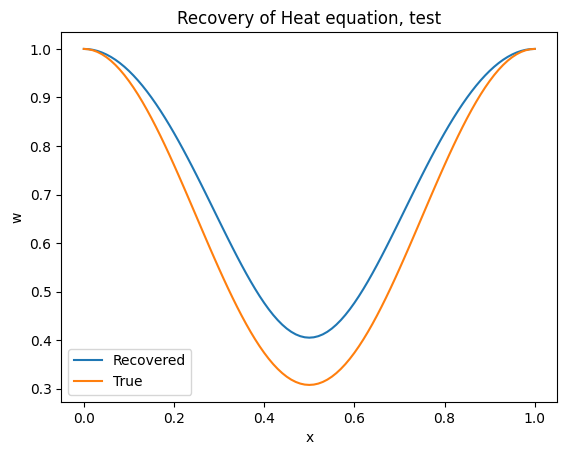

In [ ]:
plt.plot(x,results)
plt.plot(x,heat(antiburger_test[:,0]))
plt.xlabel('x')
plt.ylabel('w')
plt.legend(['Recovered','True'])
plt.title('Recovery of Heat equation, test')

In [ ]:
K-K.T

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.61558713e-27, -1.61558713e-27,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.61558713e-27,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.61558713e-27, -1.61558713e-27, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.61558713e-27,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
#test error
error(results[:,0],heat(antiburger_test[:,0]))

Array(0.10963301, dtype=float64)

Text(0.5, 1.0, 'Learned Cole-Hopf, Gaussian+exponential')

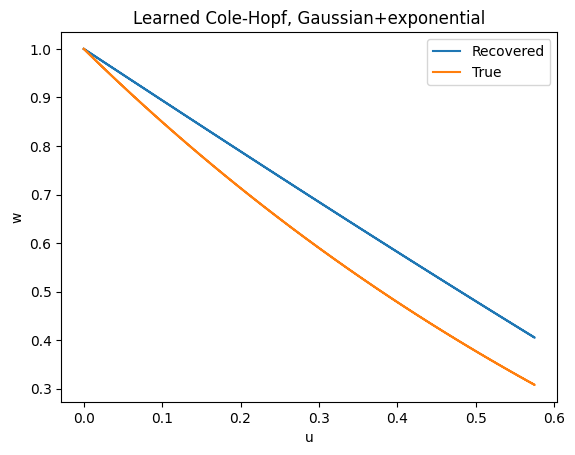

In [ ]:
plt.plot(antiburger_test[:,0],results[:,0])
plt.plot(antiburger_test[:,0],heat(antiburger_test[:,0]))
plt.xlabel('u')
plt.ylabel('w')
plt.legend(['Recovered','True'])
plt.title('Learned Cole-Hopf, Gaussian+exponential')